
# Import Library 

In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Import Data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

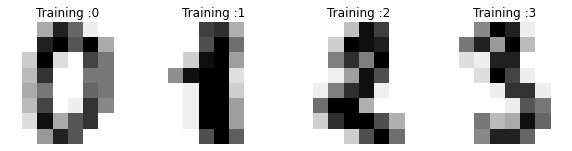

In [9]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image,label in zip (axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training :%i"%label)

# Data Preprocessing

flattening images

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
n_samples=len(df.images)

In [14]:
data=df.images.reshape((n_samples,-1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

# Scaling Data

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data=data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test= train_test_split(data,df.target,test_size=0.7,random_state=2429)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_train.shape,y_test.shape

((539, 64), (1258, 64), (539,), (539,), (1258,))


# Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()


# Predict Test Data

In [31]:
y_pred=rf.predict(x_test)

In [32]:
y_pred

array([2, 8, 1, ..., 7, 1, 8])

# Model Accuracy

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
confusion_matrix(y_test,y_pred)

array([[118,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0, 120,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 125,   1,   0,   0,   0,   1,   6,   0],
       [  0,   1,   0, 120,   0,   1,   0,   2,   5,   1],
       [  4,   0,   0,   0, 121,   0,   0,   9,   0,   0],
       [  0,   0,   0,   1,   0, 124,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 123,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 125,   0,   1],
       [  0,   5,   3,   0,   1,   1,   0,   1, 108,   1],
       [  0,   0,   0,   3,   1,   2,   0,   1,   4, 112]], dtype=int64)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       120
           1       0.95      1.00      0.98       120
           2       0.98      0.93      0.95       134
           3       0.96      0.92      0.94       130
           4       0.96      0.90      0.93       134
           5       0.97      0.98      0.97       127
           6       0.99      1.00      1.00       123
           7       0.90      0.98      0.94       127
           8       0.88      0.90      0.89       120
           9       0.97      0.91      0.94       123

    accuracy                           0.95      1258
   macro avg       0.95      0.95      0.95      1258
weighted avg       0.95      0.95      0.95      1258

